In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import pandas as pd
from csv import writer
import random
import glob, math
import seaborn as sns

Token supply life cycle interpolation

In [373]:
tbl_token_types_5years_supply_cycles = pd.read_csv("TokenTypes_5Years_SupplyCycles.csv")
tbl_token_types_3years_supply_cycles = pd.DataFrame()
x = np.arange(0, 60)
xnew = np.arange(0, 59, 59/160)
for lifecycletype in tbl_token_types_5years_supply_cycles.columns:
    y = tbl_token_types_5years_supply_cycles.loc[:, lifecycletype]

    f = interpolate.interp1d(x, y, fill_value="array_like")
    
    ynew = f(xnew)   # use interpolation function returned by `interp1d`
    tbl_token_types_3years_supply_cycles[lifecycletype] = ynew

tbl_token_types_3years_supply_cycles.to_csv("TokenTypes_3Periods_SupplyCycles.csv")

# plt.plot(x, y, 'o', xnew, ynew, '-')
# plt.show()

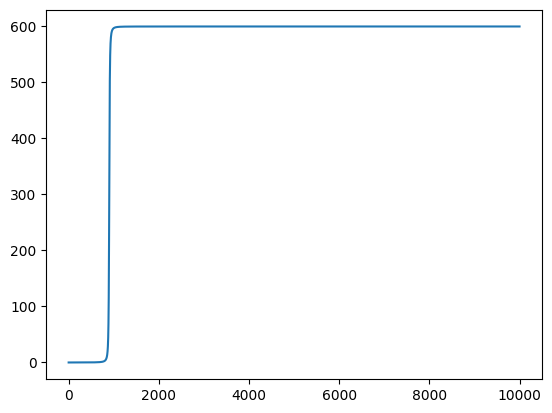

In [443]:
buyFunction = lambda s, c, c1, c2: c1*((s - c2)/math.sqrt((s-c2)**2 + c) + 1)
s = np.arange(0,10000)
p = [None] * len(s)

for s_i in s:
    p[s_i] = buyFunction(s_i, 200, 300, 900)

plt.plot(p)

In [21]:
# Read the data from the file
path = "/media/dataanalyticlab/Drive2/MANSOOR/DeFI-Agent/Code/Bonding-Curves/TBC-Agent-Based-Simulation/"

simulation_dir = "polynomial_TBC_1000Agents_For_144Terms_2m_5c_2n"
results_file_paths = glob.glob(f"{path}Results/{simulation_dir}/*")
agents_wealth_file_path = results_file_paths[0]
tokens_file_path = results_file_paths[1]
agents_file_path = results_file_paths[2]
transactions_file_path = results_file_paths[3]

save_figures_path_path = path + "Figures/"
bondingCurveType = "linear"

# agents_df = pd.read_csv(agents_file_path, sep=" ")

data = {}
with open(agents_file_path, 'r') as file:
    next(file)  # Skip the header line
    for line in file:
        parts = line.split()
        agent_id = int(parts[0])
        category = str(parts[2])
        init_liquidity = float(parts[1]) 

        if agent_id not in data:
            data[agent_id] = []
        data[agent_id].append((category, init_liquidity))

In [22]:
trans_df = pd.read_csv(transactions_file_path, sep=" ")
trans_df.head()

,TransactionID,AgentID,AgentLiquidity,TransactionType,DeltaSupply,TokenID,TokenCurrentBuyPrice,TokenCurrentSellPrice,TokenCurrentSupply,SimulationTerm
0,0,36,2033.376767,buy,0.406028,62,5.329718,5.329718,0.406028,0
1,1,363,1963.295992,buy,0.553481,31,5.612683,5.612683,0.553481,0
2,2,125,1915.843534,buy,0.428846,12,5.367817,5.367817,0.428846,0
3,3,471,1472.300054,buy,0.092519,45,5.017120,5.017120,0.092519,0
4,4,890,2362.976761,buy,0.499953,28,5.499907,5.499907,0.499953,0


In [24]:
agents_df = pd.read_csv(agents_file_path, sep=" ")
agents_df.head()

,AgentID,AgentLiquidity,AgentPurposeCategory,AgentStrategyType,RiskAppetite,ProActivity,IntelligenceGap,OwnTokenID,DoB,DoD
0,0,4958.726776,Utilizer,charty,0.485206,0.458528,0.000000,None,2,23
1,1,8486.790456,Investor,fundy,0.210668,0.158950,0.242401,None,1,49
2,2,0.000000,Creator,none,0.000000,0.000000,0.000000,0,3,75
3,3,9666.412028,Investor,fundy,0.175770,0.137608,0.253647,None,2,52
4,4,10641.089995,Investor,fundy,0.227960,0.235087,0.332249,None,4,43


In [25]:
tokens_df = pd.read_csv(tokens_file_path, sep=" ")
tokens_df.head()

,TokenID,OwnerAgentID,LifeCycleCurveShape,DoB,DoD
0,0,2,Bust_3x,3,75
1,1,7,Traditional_1x,2,74
2,2,10,Revival_1x,2,72
3,3,16,Extended_Fad_2x,4,73
4,4,21,Traditional_2x,1,68


Token price time series by life cycle shape

In [8]:
a = trans_df.merge(tokens_df,  on="TokenID", how="left")
a

,TransactionID,AgentID,AgentLiquidity,TransactionType,DeltaSupply,TokenID,TokenCurrentBuyPrice,TokenCurrentSellPrice,TokenCurrentSupply,SimulationMonth,OwnerAgentID,LifeCycleCurveShape,DoB,DoD
0,0,5,10767.160115,buy,0.217942,1,1.089712,1.089712,0.217942,1,12,Seasonal_3x,1,71
1,1,5,10767.454539,sell,0.188590,1,0.146763,0.146763,0.029353,1,12,Seasonal_3x,1,71
2,2,2,2280.059460,buy,0.034402,2,0.172008,0.172008,0.034402,1,21,Boom_classic_1x,4,75
3,3,5,10767.460026,sell,0.025933,1,0.017101,0.017101,0.003420,1,12,Seasonal_3x,1,71
4,4,11,2191.253875,buy,0.260019,2,1.472104,1.472104,0.294421,1,21,Boom_classic_1x,4,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813637,813637,288,2025.311887,clearance,0.915500,41,211.572029,211.572029,42.314406,40,399,Extended_Fad_4x,25,92
813638,813638,288,2025.878944,clearance,0.001820,10,311.487955,311.487955,62.297591,40,108,Boom_classic_3x,16,87
813639,813639,288,2037.988327,clearance,0.051729,39,233.704494,233.704494,46.740899,40,388,Fad_2x,25,92
813640,813640,288,2038.012263,clearance,0.000077,12,310.392174,310.392174,62.078435,40,133,Extended_Fad_3x,14,89


In [9]:
token_price_time_series = a.loc[:,['TokenID', 'TransactionID',"LifeCycleCurveShape", 'TokenCurrentBuyPrice']].groupby(["TokenID", "TransactionID","LifeCycleCurveShape"]).head()
token_price_time_series['LifeCycleCurveShape'] = token_price_time_series['LifeCycleCurveShape'].str.replace('_\d+x', '', regex=True)
token_price_time_series = token_price_time_series.sort_values("TokenID")
token_price_time_series

,TokenID,TransactionID,LifeCycleCurveShape,TokenCurrentBuyPrice
0,1,0,Seasonal,1.089712
414186,1,414186,Seasonal,0.000000
56416,1,56416,Seasonal,0.000000
56417,1,56417,Seasonal,0.000000
123439,1,123439,Seasonal,0.000000
...,...,...,...,...
699982,44,699982,Revival,173.042551
725766,44,725766,Revival,178.675785
739494,44,739494,Revival,183.539273
725849,44,725849,Revival,181.493769


In [ ]:
# Creating individual plots for each LifeCycleCurveShape type
unique_types = token_price_time_series['LifeCycleCurveShape'].unique()

plt.figure(figsize=(12, 8))

for i, type in enumerate(unique_types, 1):
    # plt.subplot(4, 2, i)
    type_data = token_price_time_series[token_price_time_series['LifeCycleCurveShape'] == type]
    token_ids = type_data["TokenID"].unique()
    type_data = type_data[type_data["TokenID"] == max(token_ids)]
    sns.lineplot(x='TransactionID', y='TokenCurrentBuyPrice', label=type, data=type_data)

plt.title(f'Price Time Series for Token Life Cycle Types')
plt.xlabel('Time')
plt.ylabel('Token Current Price')
plt.legend(title='Life Cycle Curve Shape')


# plt.tight_layout()
plt.show()

Token Supply/Reserves Collected by Life Cycle Type (Box Plots)

In [ ]:
token_supply_diff = a.loc[:,['TokenID', 'TransactionID',"LifeCycleCurveShape", 'TokenCurrentSupply']].groupby(['TokenID', 'LifeCycleCurveShape']).max("TransactionID").reset_index()
token_supply_diff


In [15]:
token_supply_diff['LifeCycleCurveShape_Grouped'] = token_supply_diff['LifeCycleCurveShape'].str.replace('_\d+x', '', regex=True)
token_supply_diff

,TokenID,LifeCycleCurveShape,TransactionID,TokenCurrentSupply,LifeCycleCurveShape_Grouped
0,1,Traditional_4x,271531,48.333002,Traditional
1,2,Traditional_4x,729993,87.599810,Traditional
2,3,Traditional_1x,730069,157.795630,Traditional
3,4,Bust_2x,729961,68.071271,Bust
4,5,Revival_1x,729930,187.001302,Revival
...,...,...,...,...,...
184,194,Fad_1x,730066,16.188910,Fad
185,195,Boom_classic_2x,729140,8.291418,Boom_classic
186,196,Fad_3x,729990,28.128050,Fad
187,197,Seasonal_4x,729904,16.320535,Seasonal


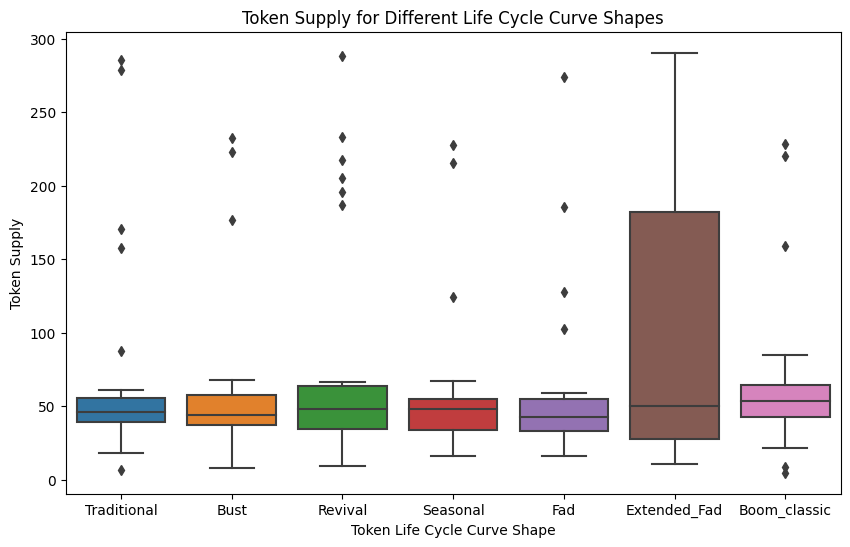

In [18]:
# Plotting the box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='LifeCycleCurveShape_Grouped', y='TokenCurrentSupply', data=token_supply_diff)
plt.title('Token Supply for Different Life Cycle Curve Shapes')
plt.xlabel('Token Life Cycle Curve Shape')
plt.ylabel('Token Supply')
plt.show()

Agent monthly wealth by purpose category

In [248]:
agents_wealth_df = pd.read_csv(agents_wealth_file_path, sep=" ", header=None).transpose()
agents_wealth_df["AgentID"] = agents_wealth_df.iloc[:,0]
agents_wealth_df = agents_wealth_df.iloc[:,1:]
# agents_wealth_df.reset_index(inplace=True)
# agents_wealth_df.rename(columns={'0',"AgentID"}, inplace=True)
# agents_wealth_df.columns
agents_wealth_df.head()

,1,2,3,4,5,6,7,8,9,10,...,38,39,40,41,42,43,44,45,46,AgentID
0,10438.538962,10496.465393,10867.924578,13703.747535,12803.841762,13321.042373,14135.526384,14625.264282,14904.609523,15414.263111,...,40372.277063,40260.332907,39409.187261,39237.602408,39173.511208,38262.229086,38298.834761,38328.515409,37796.367553,0.0
1,10122.934251,10123.010944,12122.042939,15407.668945,18145.583403,20055.935711,19714.358656,20930.097455,20434.012455,21290.103211,...,13103.140536,13143.068266,12799.915798,12764.634608,12749.865407,12416.677057,12419.547938,12422.172832,12233.657527,1.0
2,10280.793726,10286.439476,11259.126831,13251.143233,14231.742121,14905.506543,15437.920797,15685.476255,15725.967265,15806.445075,...,23375.514252,23399.279784,22851.548253,22824.123366,22824.123366,22250.282112,22250.282112,22250.282112,21954.081963,2.0
3,10007.047866,10055.848963,11213.615605,14329.382876,13488.737332,14282.972040,16560.625323,16637.428344,17108.383628,18790.953506,...,25376.955971,25464.459988,24804.774396,24771.743977,24771.743977,24080.611943,24080.611943,24080.611943,23723.869708,3.0
4,5792.926966,7112.066255,8936.069740,12144.610004,10601.909439,9925.898363,10585.131435,10838.506417,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0


In [249]:
agent_grouped = agents_wealth_df.merge(agents_df,  on="AgentID", how="left")
agent_grouped

,1,2,3,4,5,6,7,8,9,10,...,AgentID,AgentLiquidity,AgentPurposeCategory,AgentStrategyType,RiskAppetite,ProActivity,IntelligenceGap,OwnTokenID,DoB,DoD
0,10438.538962,10496.465393,10867.924578,13703.747535,12803.841762,13321.042373,14135.526384,14625.264282,14904.609523,15414.263111,...,0.0,10437.059546,Investor,fundy,0.203198,0.179728,0.233078,0,2,55
1,10122.934251,10123.010944,12122.042939,15407.668945,18145.583403,20055.935711,19714.358656,20930.097455,20434.012455,21290.103211,...,1.0,10122.813459,Investor,fundy,0.212389,0.204036,0.229597,0,1,49
2,10280.793726,10286.439476,11259.126831,13251.143233,14231.742121,14905.506543,15437.920797,15685.476255,15725.967265,15806.445075,...,2.0,10279.521727,Investor,fundy,0.189964,0.138972,0.214470,0,1,55
3,10007.047866,10055.848963,11213.615605,14329.382876,13488.737332,14282.972040,16560.625323,16637.428344,17108.383628,18790.953506,...,3.0,10004.421485,Investor,fundy,0.200223,0.207877,0.200276,0,2,50
4,5792.926966,7112.066255,8936.069740,12144.610004,10601.909439,9925.898363,10585.131435,10838.506417,0.000000,0.000000,...,4.0,2143.341461,Speculator,noisy,0.374514,0.551899,0.000000,0,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,995.0,5822.190251,Utilizer,charty,0.328322,0.353358,0.000000,0,48,67
996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,996.0,8751.694595,Investor,noisy,0.637432,0.393770,0.000000,0,44,92
997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,997.0,5095.112612,Utilizer,charty,0.496479,0.465752,0.000000,0,40,61
998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,998.0,9424.815589,Investor,fundy,0.195389,0.125693,0.214515,0,56,104


In [196]:
data = agent_grouped[(agent_grouped['AgentPurposeCategory'] == "Utilizer") & (agent_grouped['AgentID'] == 0)]
data

,1,2,3,4,5,6,7,8,9,10,AgentID,AgentLiquidity,AgentPurposeCategory,AgentStrategyType,RiskAppetite,ProActivity,IntelligenceGap,OwnTokenID,DoB,DoD
0,5794.753761,5794.753761,5794.753761,5794.753761,5794.753761,5794.753761,5794.753761,5794.753761,5794.753761,5794.753761,0.0,5794.753761,Utilizer,charty,0.397255,0.350231,0.0,0,1,27


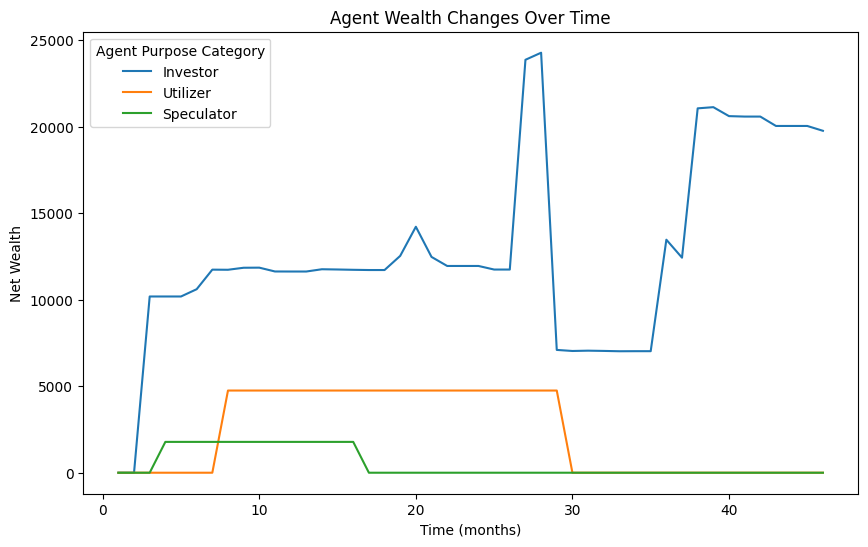

In [295]:
# Creating individual plots for each LifeCycleCurveShape type
unique_types = agent_grouped['AgentPurposeCategory'].unique()
unique_types = ["Investor", "Utilizer", "Speculator"]

plt.figure(figsize=(10, 6))

for i, type in enumerate(unique_types):
    type_data = agent_grouped[agent_grouped['AgentPurposeCategory'] == type]
    agend_ids = random.choices(type_data["AgentID"].unique())[0]
    sns.lineplot(agents_wealth_df.iloc[int(agend_ids), :-1], label=type)

plt.title(f'Agent Wealth Changes Over Time')
plt.xlabel('Time (months)')
plt.ylabel('Net Wealth')
plt.legend(title='Agent Purpose Category')

plt.show()

Agents net wealth by purpose category

In [41]:
agents_wealth_df = pd.read_csv(agents_wealth_file_path, sep=" ", header=None).transpose()
agents_df = pd.read_csv(agents_file_path, sep=" ")

agents_wealth_df["AgentID"] = agents_wealth_df.iloc[:,0]
agents_wealth_df = agents_wealth_df.iloc[:,1:]
agent_grouped = agents_df.merge(agents_wealth_df,  on="AgentID", how="left")
agent_grouped

,AgentID,AgentLiquidity,AgentPurposeCategory,AgentStrategyType,RiskAppetite,ProActivity,IntelligenceGap,OwnTokenID,DoB,DoD,...,135,136,137,138,139,140,141,142,143,144
0,0,4958.726776,Utilizer,charty,0.485206,0.458528,0.000000,None,2,23,...,4.958727e+03,4.958727e+03,4.958727e+03,4.958727e+03,4.958727e+03,4.958727e+03,4.958727e+03,4.958727e+03,4.958727e+03,4.958727e+03
1,1,8486.790456,Investor,fundy,0.210668,0.158950,0.242401,None,1,49,...,3.793935e+03,3.793935e+03,3.793935e+03,3.793935e+03,3.793935e+03,3.793935e+03,3.793935e+03,3.793935e+03,3.793935e+03,3.793935e+03
2,2,0.000000,Creator,none,0.000000,0.000000,0.000000,0,3,75,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,3,9666.412028,Investor,fundy,0.175770,0.137608,0.253647,None,2,52,...,6.661602e+03,6.661602e+03,6.661602e+03,6.661602e+03,6.661602e+03,6.661602e+03,6.661602e+03,6.661602e+03,6.661602e+03,6.661602e+03
4,4,10641.089995,Investor,fundy,0.227960,0.235087,0.332249,None,4,43,...,5.512916e+04,5.512916e+04,5.512916e+04,5.512916e+04,5.512916e+04,5.512916e+04,5.512916e+04,5.512916e+04,5.512916e+04,5.512916e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1641.684727,Speculator,noisy,0.513629,0.455339,0.000000,None,30,41,...,6.700316e+06,6.895812e+06,7.084500e+06,7.281587e+06,7.390649e+06,7.523713e+06,7.722441e+06,7.771657e+06,7.830073e+06,8.017197e+06
996,996,1736.417854,Speculator,noisy,0.530735,0.552725,0.000000,None,32,44,...,1.056629e+07,1.055013e+07,1.071537e+07,1.077354e+07,1.091454e+07,1.113847e+07,1.121986e+07,1.141020e+07,1.172812e+07,1.207809e+07
997,997,1989.444864,Speculator,noisy,0.660556,0.501470,0.000000,None,29,41,...,6.212169e+06,6.510069e+06,6.613987e+06,6.775961e+06,6.890861e+06,7.066685e+06,7.243339e+06,7.316083e+06,7.532821e+06,7.821452e+06
998,998,4555.106755,Utilizer,charty,0.377238,0.323581,0.000000,None,31,59,...,4.555107e+03,4.555107e+03,4.555107e+03,4.555107e+03,4.555107e+03,4.555107e+03,4.555107e+03,4.555107e+03,4.555107e+03,4.555107e+03


In [70]:
agents_wealth_by_purp = agent_grouped.iloc[:,[2,-1]]
agents_wealth_by_purp.columns = ["AgentPurposeCategory", "ClosingWealth"]
agents_wealth_by_purp = agents_wealth_by_purp.loc[agents_wealth_by_purp["AgentPurposeCategory"] != "Creator"]
# agents_wealth_by_purp.columns = agents_wealth_by_purp.columns.str.strip()
agents_wealth_by_purp


,AgentPurposeCategory,ClosingWealth
0,Utilizer,4.958727e+03
1,Investor,3.793935e+03
3,Investor,6.661602e+03
4,Investor,5.512916e+04
5,Utilizer,4.661643e+03
...,...,...
995,Speculator,8.017197e+06
996,Speculator,1.207809e+07
997,Speculator,7.821452e+06
998,Utilizer,4.555107e+03


In [96]:
DoB = agent_grouped.loc[:, "DoB"]
initial_wealth = [None]* len(DoB)
for i in range(len(DoB)):
    initial_wealth[i] = agent_grouped.iloc[i, 10 + DoB[i]]
closing_wealth = agent_grouped.iloc[:,-1]
wealth_diff = closing_wealth - initial_wealth

agents_wealth_diff_by_purp = pd.DataFrame( {"AgentPurposeCategory": agent_grouped.loc[:,"AgentPurposeCategory"], "WealthDifference": wealth_diff})
# agents_wealth_by_purp.columns = ["AgentPurposeCategory", "ClosingWealth"]
agents_wealth_diff_by_purp = agents_wealth_diff_by_purp.loc[agents_wealth_diff_by_purp["AgentPurposeCategory"] != "Creator"]
# agents_wealth_by_purp.columns = agents_wealth_by_purp.columns.str.strip()
agents_wealth_diff_by_purp

,AgentPurposeCategory,WealthDifference
0,Utilizer,0.000000e+00
1,Investor,-8.929686e+03
3,Investor,6.465969e+02
4,Investor,-2.114513e+04
5,Utilizer,0.000000e+00
...,...,...
995,Speculator,7.879781e+06
996,Speculator,1.187425e+07
997,Speculator,7.719158e+06
998,Utilizer,0.000000e+00


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgentPurposeCategory', y='WealthDifference', data=agents_wealth_diff_by_purp)
plt.title('Liquidity Gained/Lost by Agents', weight='bold', fontsize=18)
plt.xlabel('Agent Purpose Category', fontweight='bold', fontsize=16)
plt.ylabel('Liquidity Difference (Final - Initial)', fontweight='bold', fontsize=16)
plt.show()

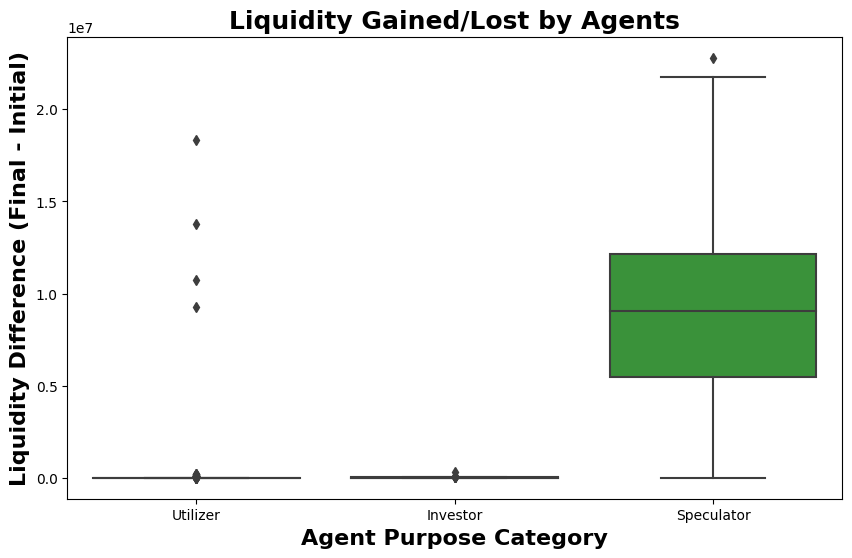

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgentPurposeCategory', y='ClosingWealth', data=agents_wealth_by_purp)
plt.title('Liquidity Gained/Lost by Agents', weight='bold', fontsize=18)
plt.xlabel('Agent Purpose Category', fontweight='bold', fontsize=16)
plt.ylabel('Liquidity Difference (Final - Initial)', fontweight='bold', fontsize=16)
plt.show()

Agent liquidity change over time by purpose category

In [7]:
agent_grouped = trans_df.merge(agents_df,  on="AgentID", how="left")
agent_grouped

,TransactionID,AgentID,AgentLiquidity_x,TransactionType,DeltaSupply,TokenID,TokenCurrentBuyPrice,TokenCurrentSellPrice,TokenCurrentSupply,SimulationMonth,AgentLiquidity_y,AgentPurposeCategory,AgentStrategyType,RiskAppetite,ProActivity,IntelligenceGap,OwnTokenID,DoB,DoD
0,0,5,10767.160115,buy,0.217942,1,1.089712,1.089712,0.217942,1,10767.278863,Investor,fundy,0.217814,0.089512,0.242359,0,2,44
1,1,5,10767.454539,sell,0.188590,1,0.146763,0.146763,0.029353,1,10767.278863,Investor,fundy,0.217814,0.089512,0.242359,0,2,44
2,2,2,2280.059460,buy,0.034402,2,0.172008,0.172008,0.034402,1,2280.062419,Speculator,noisy,0.625114,0.366963,0.000000,0,2,14
3,3,5,10767.460026,sell,0.025933,1,0.017101,0.017101,0.003420,1,10767.278863,Investor,fundy,0.217814,0.089512,0.242359,0,2,44
4,4,11,2191.253875,buy,0.260019,2,1.472104,1.472104,0.294421,1,2191.467625,Speculator,noisy,0.525482,0.694441,0.000000,0,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813637,813637,288,2025.311887,clearance,0.915500,41,211.572029,211.572029,42.314406,40,1970.874825,Speculator,noisy,0.723314,0.503866,0.000000,0,30,40
813638,813638,288,2025.878944,clearance,0.001820,10,311.487955,311.487955,62.297591,40,1970.874825,Speculator,noisy,0.723314,0.503866,0.000000,0,30,40
813639,813639,288,2037.988327,clearance,0.051729,39,233.704494,233.704494,46.740899,40,1970.874825,Speculator,noisy,0.723314,0.503866,0.000000,0,30,40
813640,813640,288,2038.012263,clearance,0.000077,12,310.392174,310.392174,62.078435,40,1970.874825,Speculator,noisy,0.723314,0.503866,0.000000,0,30,40


In [69]:
agent_grouped[agent_grouped['AgentPurposeCategory'] == "Investor"].loc[:,['AgentID', "TransactionID", 'AgentPurposeCategory', "AgentLiquidity_x"]]

,AgentID,TransactionID,AgentPurposeCategory,AgentLiquidity_x
0,5,0,Investor,1.076716e+04
1,5,1,Investor,1.076745e+04
3,5,3,Investor,1.076746e+04
9,5,9,Investor,1.076746e+04
10,5,10,Investor,1.076746e+04
...,...,...,...,...
813453,80,813453,Investor,1.019043e+04
813456,82,813456,Investor,1.021798e+00
813457,310,813457,Investor,1.216378e-33
813461,408,813461,Investor,8.079305e+00


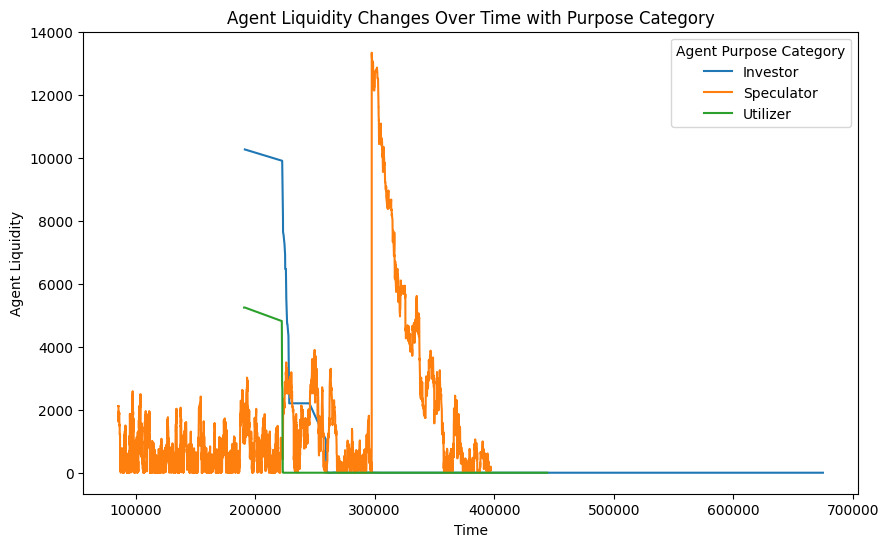

In [85]:
# Creating individual plots for each LifeCycleCurveShape type
unique_types = agent_grouped['AgentPurposeCategory'].unique()

plt.figure(figsize=(10, 6))

for i, type in enumerate(unique_types, 1):
    type_data = agent_grouped[agent_grouped['AgentPurposeCategory'] == type].loc[:,['AgentID', "TransactionID", 'AgentPurposeCategory', "AgentLiquidity_x"]]
    agend_ids = type_data["AgentID"].unique()
    type_data = type_data[type_data["AgentID"] == random.choices(agend_ids)[0]]
    sns.lineplot(x='TransactionID', y='AgentLiquidity_x', label=type, data=type_data)

plt.title(f'Agent Liquidity Changes Over Time with Purpose Category')
plt.xlabel('Time')
plt.ylabel('Agent Liquidity')
plt.legend(title='Agent Purpose Category')

plt.show()

In [12]:
agent_liquidity_time_series = agent_grouped.loc[:,['AgentID', 'AgentPurposeCategory', "AgentLiquidity_y"]].groupby(['AgentPurposeCategory']).head()
agent_liquidity_time_series
# = token_price_time_series.sort_values("AgentID")

,AgentID,AgentPurposeCategory,AgentLiquidity_y
0,5,Investor,10767.278863
1,5,Investor,10767.278863
2,2,Speculator,2280.062419
3,5,Investor,10767.278863
4,11,Speculator,2191.467625
5,11,Speculator,2191.467625
6,11,Speculator,2191.467625
7,2,Speculator,2280.062419
9,5,Investor,10767.278863
10,5,Investor,10767.278863


Agent Liquidity Gained/Lost by Purpose Category (Box Plots)

In [92]:
agents_liq_diff = a.loc[:,['AgentID', 'AgentPurposeCategory',"AgentLiquidity_y", "AgentLiquidity_x"]].groupby(['AgentID', 'AgentPurposeCategory']).max("TransactionID")
agents_liq_diff = agents_liq_diff.reset_index()
agents_liq_diff["LiquidityDifference"] = agents_liq_diff.loc[:,"AgentLiquidity_x"] -  agents_liq_diff.loc[:,"AgentLiquidity_y"]
# agents_liq_df = agents_liq_diff.loc[:,["AgentID", "AgentPurposeCategory"]]
agents_liq_diff


,AgentID,AgentPurposeCategory,AgentLiquidity_y,AgentLiquidity_x,LiquidityDifference
0,2,Speculator,1667.633242,19128.740711,17461.107468
1,3,Speculator,2338.826153,6598.328299,4259.502146
2,5,Investor,11388.217389,15120.478989,3732.261600
3,6,Investor,9509.692800,9513.797561,4.104761
4,8,Investor,8261.106790,8270.770417,9.663627
...,...,...,...,...,...
885,1673,Investor,10222.549125,10236.459238,13.910113
886,1676,Speculator,1814.446628,1731.960970,-82.485658
887,1678,Speculator,1925.239977,1925.249757,0.009780
888,1679,Utilizer,5233.677830,5171.285805,-62.392025


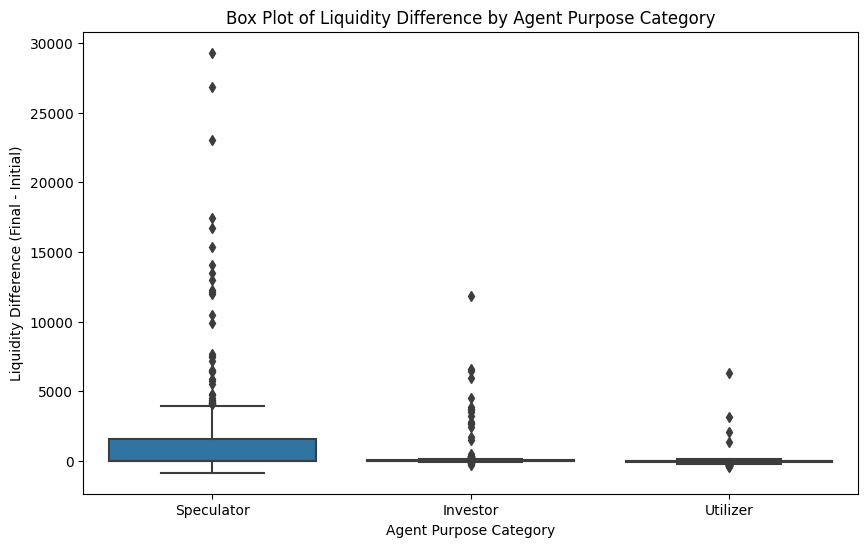

In [93]:
# Plotting the box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgentPurposeCategory', y='LiquidityDifference', data=agents_liq_diff)
plt.title('Box Plot of Liquidity Difference by Agent Purpose Category')
plt.xlabel('Agent Purpose Category')
plt.ylabel('Liquidity Difference (Final - Initial)')
plt.show()

In [ ]:
# Merge the datasets on AgentID
merged_df = pd.merge(trans_df, agents_df[['AgentID', 'AgentPurposeCategory']], on='AgentID')

# Group by PurposeCategory and SimulationMonth or TransactionID
grouped = merged_df.groupby(['AgentPurposeCategory', 'SimulationMonth'])

# Calculate the change in liquidity for each group
liquidity_change = grouped['AgentLiquidity'].sum().unstack()

# Plotting
liquidity_change.plot(kind='line')
plt.title('Change in Liquidity by Purpose Category Over Time')
plt.xlabel('Simulation Month')
plt.ylabel('Liquidity Change')
plt.legend(title='Purpose Category')
plt.show()

<Figure size 640x480 with 0 Axes>

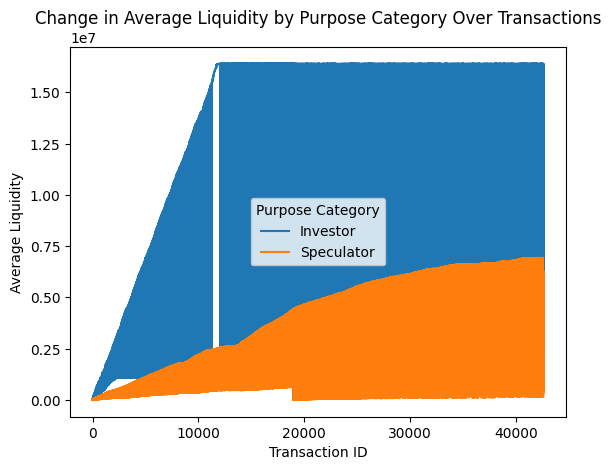

In [37]:
# Merge the datasets on AgentID
merged_df = pd.merge(trans_df, agents_df[['AgentID', 'AgentPurposeCategory']], on='AgentID')

# Sort by TransactionID to ensure correct order of transactions
merged_df.sort_values(by='TransactionID', inplace=True)

# Calculate the running total of liquidity for each agent
merged_df['RunningLiquidity'] = merged_df.groupby('AgentID')['AgentLiquidity'].cumsum()

# Group by PurposeCategory and TransactionID, then calculate the mean liquidity
grouped = merged_df.groupby(['AgentPurposeCategory', 'TransactionID'])['RunningLiquidity'].mean().unstack()
plt.figure()
# Plotting
grouped.T.plot(kind='line') # Transpose to have TransactionID on the x-axis
plt.title('Change in Average Liquidity by Purpose Category Over Transactions')
plt.xlabel('Transaction ID')
plt.ylabel('Average Liquidity')
plt.legend(title='Purpose Category')
plt.show()


In [38]:
merged_df

,TransactionID,AgentID,AgentLiquidity,TransactionType,DeltaSupply,TokenID,TokenCurrentBuyPrice,TokenCurrentSellPrice,TokenCurrentSupply,SimulationMonth,AgentPurposeCategory,RunningLiquidity
0,0,29,2.004140e+03,buy,9.527138e-01,2,4.763569,4.763569,0.952714,1,Speculator,2.004140e+03
885,1,9,1.604834e+03,buy,9.704529e-01,3,4.852265,4.852265,0.970453,1,Speculator,1.604834e+03
4810,2,44,1.135247e+04,buy,2.156373e-01,3,5.930451,5.930451,1.186090,1,Investor,1.135247e+04
4811,3,44,1.135266e+04,sell,3.291382e-02,3,5.765882,5.765882,1.153176,1,Investor,2.270513e+04
4812,4,44,1.135348e+04,sell,1.335696e-01,3,5.098034,5.098034,1.019607,1,Investor,3.405861e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
40460,42606,33,9.908357e+03,sell,2.330092e-243,4,176.259011,176.259011,35.251802,2,Investor,3.507558e+06
30403,42607,41,3.280155e+02,sell,1.787147e-02,3,721.139812,721.139812,144.227962,2,Speculator,4.084623e+05
27391,42608,57,2.399642e-207,buy,8.687625e-209,4,176.259011,176.259011,35.251802,2,Investor,1.232214e+06
16302,42609,22,2.964394e-323,buy,0.000000e+00,4,176.259011,176.259011,35.251802,2,Investor,1.638673e+07
